In [235]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import seaborn as sns
%matplotlib widget

In [236]:
df = pd.read_csv("filtered_df.csv")
df

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,1,I'm really disappointed about my phone and ser...,1.0
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,I was able to get the phone I previously owned...,6.0
2,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,I love the phone. It does everything I need an...,1.0
3,"""Nokia Asha 302 Unlocked GSM Phone with 3.2MP ...",Nokia,299.00,5,Bought this as an alternative to a smart phone...,1.0
4,"""Nokia Asha 302 Unlocked GSM Phone with 3.2MP ...",Nokia,299.00,5,Used this unlocked GSM Nokia Asha 302 in the P...,1.0
...,...,...,...,...,...,...
59317,Samsung Convoy U640 Phone for Verizon Wireless...,Samsung,79.95,5,Really like the phone and ease of use. The scr...,12.0
59318,Samsung Convoy U640 Phone for Verizon Wireless...,Samsung,79.95,5,Much better than I expected. This phone has ev...,2.0
59319,Samsung Convoy U640 Phone for Verizon Wireless...,Samsung,79.95,2,This phone started out working beautifully for...,NaN
59320,Samsung Convoy U640 Phone for Verizon Wireless...,Samsung,79.95,3,"I like flip phones, they are easily to use.I h...",2.0


In [247]:
from transformers import AutoTokenizer, AutoModel
import torch

def get_sentence_embedding(sentence, model, tokenizer):
    # Tokenize input sentence
    tokens = tokenizer(sentence, return_tensors="pt", truncation=True, max_length=512)

    # Get the transformer model output
    with torch.no_grad():
        outputs = model(**tokens)

    # Extract the output embeddings (CLS token)
    embeddings = outputs.last_hidden_state[:, 0, :]

    return embeddings.numpy()

# Load pre-trained model and tokenizer
model_name = "distilbert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModel.from_pretrained(model_name)

# Example sentence
example_sentence = "This mobile phone was very good"

# Get sentence embedding
sentence_embedding = get_sentence_embedding(example_sentence, model, tokenizer)

# Convert to numpy array for easier handling
sentence_embedding_np = sentence_embedding


In [248]:
counts = df["Product Name"].value_counts().reset_index()
subset = df[df["Product Name"] == counts.iloc[70]["Product Name"]]
subset["embedding"] = subset["Reviews"].apply(get_sentence_embedding, args = (model, tokenizer))
subset

C:\Users\Lola Monroy Mir\AppData\Local\Temp\ipykernel_24140\621941104.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Product Name,Brand Name,Price,Rating,Reviews,Review Votes,embedding
13464,BLU Life 8 XL Smartphone - Unlocked - US GSM -...,BLU,101.91,3,Worth what I paid for it but freezes up and ha...,1.0,"[[-0.060920257, -0.15815975, 0.2369216, -0.050..."
13465,BLU Life 8 XL Smartphone - Unlocked - US GSM -...,BLU,101.91,1,Really disappointed. Two weeks use and the spe...,1.0,"[[0.048616894, 0.0016777646, 0.1554654, -0.077..."
13466,BLU Life 8 XL Smartphone - Unlocked - US GSM -...,BLU,101.91,5,Great phone for the price. No issues and funct...,3.0,"[[-0.050249405, -0.18043527, 0.22449337, -0.02..."
13467,BLU Life 8 XL Smartphone - Unlocked - US GSM -...,BLU,101.91,5,"I've had this phone for a week now, and wanted...",1.0,"[[-0.17647265, -0.1010026, 0.14397466, -0.1855..."
13468,BLU Life 8 XL Smartphone - Unlocked - US GSM -...,BLU,101.91,4,I've had this for two weeks now and I'm pretty...,1.0,"[[-0.12717667, -0.00946337, 0.073418185, -0.29..."
...,...,...,...,...,...,...,...
13567,BLU Life 8 XL Smartphone - Unlocked - US GSM -...,BLU,101.91,4,Blu Life 8 XL US GSMPros:Price $79 on Pre Orde...,NaN,"[[-0.031581588, -0.12049657, 0.25889283, -0.11..."
13568,BLU Life 8 XL Smartphone - Unlocked - US GSM -...,BLU,101.91,4,Speaking as a customer who's sole interest in ...,2.0,"[[-0.06787015, -0.087844536, 0.08985419, -0.16..."
13569,BLU Life 8 XL Smartphone - Unlocked - US GSM -...,BLU,101.91,2,We were promised Android 5.0 Lollipop on this ...,4.0,"[[0.036945507, -0.1584142, 0.2621258, -0.16874..."
13570,BLU Life 8 XL Smartphone - Unlocked - US GSM -...,BLU,101.91,3,The phone is good value for the price. Though ...,2.0,"[[0.05714097, -0.2500077, 0.32341874, -0.02356..."


In [249]:

pca = PCA(n_components=3)
embed = np.vstack(subset["embedding"].to_numpy())
project = pca.fit_transform(embed)
kmeans = KMeans(n_clusters=3)
clusters = kmeans.fit_predict(embed)
subset["cluster"] = clusters

C:\Users\Lola Monroy Mir\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\Lola Monroy Mir\AppData\Local\Temp\ipykernel_24140\2820431430.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



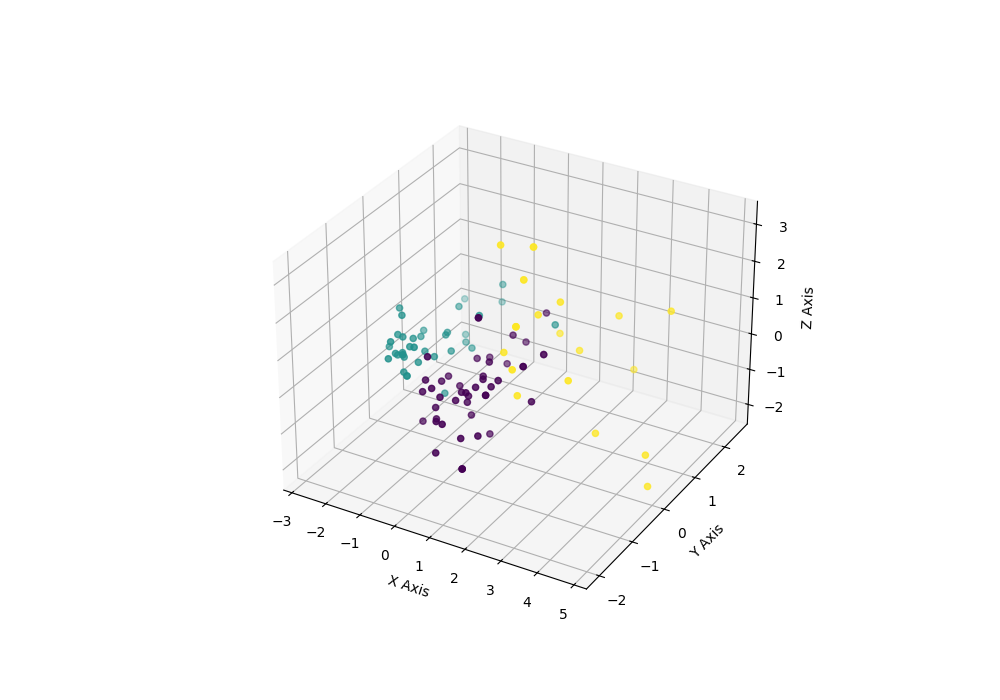

In [250]:
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
ax.set_xlabel('X Axis')
ax.set_ylabel('Y Axis')
ax.set_zlabel('Z Axis')
ax.scatter3D(project[:,0], project[:,1], project[:,2], c=clusters)


In [251]:
subset

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes,embedding,cluster
13464,BLU Life 8 XL Smartphone - Unlocked - US GSM -...,BLU,101.91,3,Worth what I paid for it but freezes up and ha...,1.0,"[[-0.060920257, -0.15815975, 0.2369216, -0.050...",1
13465,BLU Life 8 XL Smartphone - Unlocked - US GSM -...,BLU,101.91,1,Really disappointed. Two weeks use and the spe...,1.0,"[[0.048616894, 0.0016777646, 0.1554654, -0.077...",0
13466,BLU Life 8 XL Smartphone - Unlocked - US GSM -...,BLU,101.91,5,Great phone for the price. No issues and funct...,3.0,"[[-0.050249405, -0.18043527, 0.22449337, -0.02...",0
13467,BLU Life 8 XL Smartphone - Unlocked - US GSM -...,BLU,101.91,5,"I've had this phone for a week now, and wanted...",1.0,"[[-0.17647265, -0.1010026, 0.14397466, -0.1855...",1
13468,BLU Life 8 XL Smartphone - Unlocked - US GSM -...,BLU,101.91,4,I've had this for two weeks now and I'm pretty...,1.0,"[[-0.12717667, -0.00946337, 0.073418185, -0.29...",1
...,...,...,...,...,...,...,...,...
13567,BLU Life 8 XL Smartphone - Unlocked - US GSM -...,BLU,101.91,4,Blu Life 8 XL US GSMPros:Price $79 on Pre Orde...,NaN,"[[-0.031581588, -0.12049657, 0.25889283, -0.11...",0
13568,BLU Life 8 XL Smartphone - Unlocked - US GSM -...,BLU,101.91,4,Speaking as a customer who's sole interest in ...,2.0,"[[-0.06787015, -0.087844536, 0.08985419, -0.16...",1
13569,BLU Life 8 XL Smartphone - Unlocked - US GSM -...,BLU,101.91,2,We were promised Android 5.0 Lollipop on this ...,4.0,"[[0.036945507, -0.1584142, 0.2621258, -0.16874...",2
13570,BLU Life 8 XL Smartphone - Unlocked - US GSM -...,BLU,101.91,3,The phone is good value for the price. Though ...,2.0,"[[0.05714097, -0.2500077, 0.32341874, -0.02356...",2


In [242]:
rating_words = [{} for i in range(3)]
for i in range(3):
    subset_cluster = subset[subset["cluster"] == i]
    rating_words[i]['total'] = round(subset_cluster["Rating"].mean(), 2)
    for word in terms_group_more[i][0:5]:
        reviews = subset_cluster[subset_cluster["preprocessed"].apply(lambda x: any(word[0] in s for s in x))]
        rating_words[i][word[0]] = round(reviews["Rating"].mean(), 2)


KeyError: 'preprocessed'

In [252]:
str(rating_words[0])

"{'total': 3.69}"

In [253]:
labels = []
for i in range(project.shape[0]):
    labels.append([terms_group_more[clusters[i]][j][0] for j in range(5)])

labels = []
for i in range(project.shape[0]):
    labels.append(str(rating_words[clusters[i]]).replace(',', '<br>'))
 
# Create a 3D scatter plot with hover text
fig = px.scatter_3d(x=project[:,0], y=project[:,1], z=project[:,2], hover_name=labels, hover_data = [], color=clusters, size=[2]*project.shape[0])

# Set layout options for better readability
fig.update_layout(
    title="Interactive 3D Scatter Plot with Hover Text",
    scene=dict(
        xaxis_title="X-axis",
        yaxis_title="Y-axis",
        zaxis_title="Z-axis"
    )
)

# Show the plot
fig.show()

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data=subset, x='Rating', hue='cluster', multiple="stack", bins=5)
plt.show()

In [243]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from collections import Counter
import nltk
nltk.download('stopwords')
nltk.download('punkt')

def preprocess(doc):
    stop_words = set(stopwords.words('english'))
    ps = PorterStemmer()
    processed_docs = []
    words = [ps.stem(word.lower()) for word in word_tokenize(doc) if word.isalpha() and word.lower() not in stop_words]
    return words

def calculate_term_frequency(documents):
    term_frequency = Counter()
    for doc in documents:
        term_frequency.update(doc)
    return term_frequency

subset["preprocessed"] = subset["Reviews"].apply(preprocess)
tf_group = [calculate_term_frequency(subset["preprocessed"][subset["cluster"] == i]) for i in range(3)]
terms_group_more = [{term: tf_group[i][term] for term in tf_group[i] if tf_group[i][term] > tf_group[(i+1)%3][term] 
                        and tf_group[i][term] > tf_group[(i+2)%3][term]} for i in range(3)]
terms_group_more = [sorted(cnt.items(), key=lambda x: x[1], reverse=True) for cnt in terms_group_more]

[nltk_data] Downloading package stopwords to C:\Users\Lola Monroy
[nltk_data]     Mir\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\Lola Monroy
[nltk_data]     Mir\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
C:\Users\Lola Monroy Mir\AppData\Local\Temp\ipykernel_24140\179199217.py:22: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [244]:
terms_group_more[0]

[('screen', 92),
 ('devic', 61),
 ('use', 55),
 ('get', 44),
 ('like', 38),
 ('issu', 37),
 ('would', 33),
 ('great', 31),
 ('work', 30),
 ('back', 30),
 ('time', 29),
 ('camera', 28),
 ('even', 27),
 ('also', 26),
 ('lollipop', 26),
 ('still', 25),
 ('card', 24),
 ('day', 23),
 ('updat', 23),
 ('littl', 22),
 ('love', 21),
 ('tri', 21),
 ('run', 19),
 ('thing', 18),
 ('bought', 16),
 ('custom', 16),
 ('upgrad', 15),
 ('ca', 15),
 ('call', 15),
 ('look', 15),
 ('big', 15),
 ('deal', 14),
 ('nice', 14),
 ('say', 14),
 ('servic', 14),
 ('first', 14),
 ('buy', 13),
 ('sinc', 13),
 ('button', 13),
 ('put', 13),
 ('though', 13),
 ('video', 13),
 ('let', 12),
 ('volum', 12),
 ('seem', 12),
 ('definit', 12),
 ('send', 12),
 ('almost', 12),
 ('nexu', 12),
 ('charg', 12),
 ('give', 11),
 ('might', 11),
 ('actual', 11),
 ('receiv', 11),
 ('turn', 11),
 ('want', 11),
 ('text', 11),
 ('differ', 10),
 ('tell', 10),
 ('know', 10),
 ('abl', 10),
 ('respons', 10),
 ('ok', 10),
 ('went', 9),
 ('power',

In [246]:
import plotly.express as px

# Generate some example data
data = {
    'x': [1, 2, 3, 4, 5],
    'y': [2, 3, 5, 4, 1],
    'z': [3, 1, 2, 4, 5],
    'cluster': [0,0,1,2,0]
}
labels = []
for i in range(5):
    labels.append([terms_group_more[data['cluster'][i]][j][0] for j in range(5)])

data['labels'] = labels

# Create a 3D scatter plot with hover text
fig = px.scatter_3d(data, x='x', y='y', z='z', hover_name='labels', color='cluster')

# Set layout options for better readability
fig.update_layout(
    title="Interactive 3D Scatter Plot with Hover Text",
    scene=dict(
        xaxis_title="X-axis",
        yaxis_title="Y-axis",
        zaxis_title="Z-axis"
    )
)

# Show the plot
fig.show()